### Billionaires Analysis

#### In this projects, a dataset is taken from Kaggle which contains the information about top billionaires from around the world in 2021

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Checking out the dataset

data = pd.read_csv("F:\Data Analysis Projects\Billionaire Analysis\Billionaries Analysis.csv")
data

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology
...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,$1 B,China,e-commerce,2674,49.0,Technology
2751,Zhang Yuqiang,$1 B,China,Fiberglass,2674,65.0,Manufacturing
2752,Zhao Meiguang,$1 B,China,gold mining,2674,58.0,Metals & Mining
2753,Zhong Naixiong,$1 B,China,conglomerate,2674,58.0,Diversified


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      2755 non-null   object 
 1   NetWorth  2755 non-null   object 
 2   Country   2755 non-null   object 
 3   Source    2755 non-null   object 
 4   Rank      2755 non-null   int64  
 5   Age       2676 non-null   float64
 6   Industry  2755 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 150.8+ KB


In [5]:
data.describe()

,Rank,Age
count,2755.000000,2676.000000
mean,1345.663521,63.113602
std,772.669811,13.445153
min,1.000000,18.000000
25%,680.000000,54.000000
50%,1362.000000,63.000000
75%,2035.000000,73.000000
max,2674.000000,99.000000


In [6]:
# Checking if the dataset has any null values or not

print(data.isnull().sum())

# isnull(): returns a DataFrame object where all the values are 
#           replaced with a Boolean value True for NULL values, 
#           and otherwise False.

#isnull().sum(): used to find out number of null records

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64


#### This dataset contain 79 missing records in the 'Age' column
#### We need to fill those values with 'mode' of the age.
#### Note that, since number of null records is very less compared to total records, so deleting those records can also be a solution.

In [7]:
data.fillna(data['Age'].mode()[0], inplace=True)

In [8]:
print(data.isnull().sum())

Name        0
NetWorth    0
Country     0
Source      0
Rank        0
Age         0
Industry    0
dtype: int64


### The 'NetWorth' column contains string objects instead of float values, so wee need to remove the characters from the column records and convert it to float type

In [9]:
data['NetWorth'] = data['NetWorth'].map(str)
data['NetWorth'] = data['NetWorth'].str.strip('$')
data['NetWorth'] = data['NetWorth'].str.strip('B')
data['NetWorth'] = data['NetWorth'].astype(float)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      2755 non-null   object 
 1   NetWorth  2755 non-null   float64
 2   Country   2755 non-null   object 
 3   Source    2755 non-null   object 
 4   Rank      2755 non-null   int64  
 5   Age       2755 non-null   float64
 6   Industry  2755 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 150.8+ KB


#### Checking out top 10 billionaires based on networth

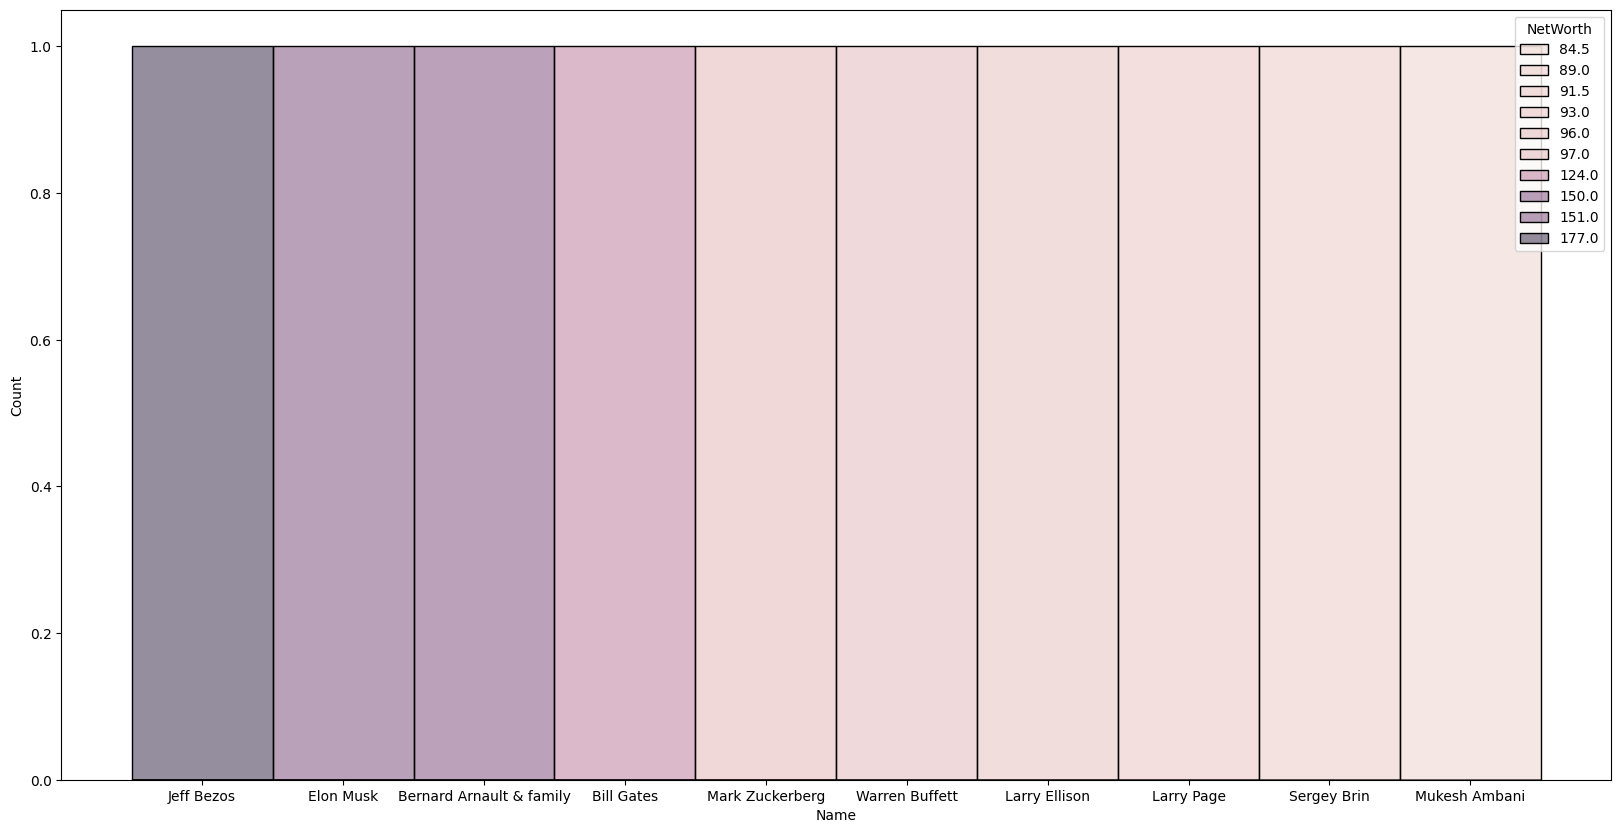

In [13]:
df = data.sort_values(by=['NetWorth'], ascending=False).head(10)
plt.figure(figsize=(20,10))
sns.histplot(x='Name', hue='NetWorth', data=df)
plt.show()

#### Now let's look at top 5 domains with most of the billionaires

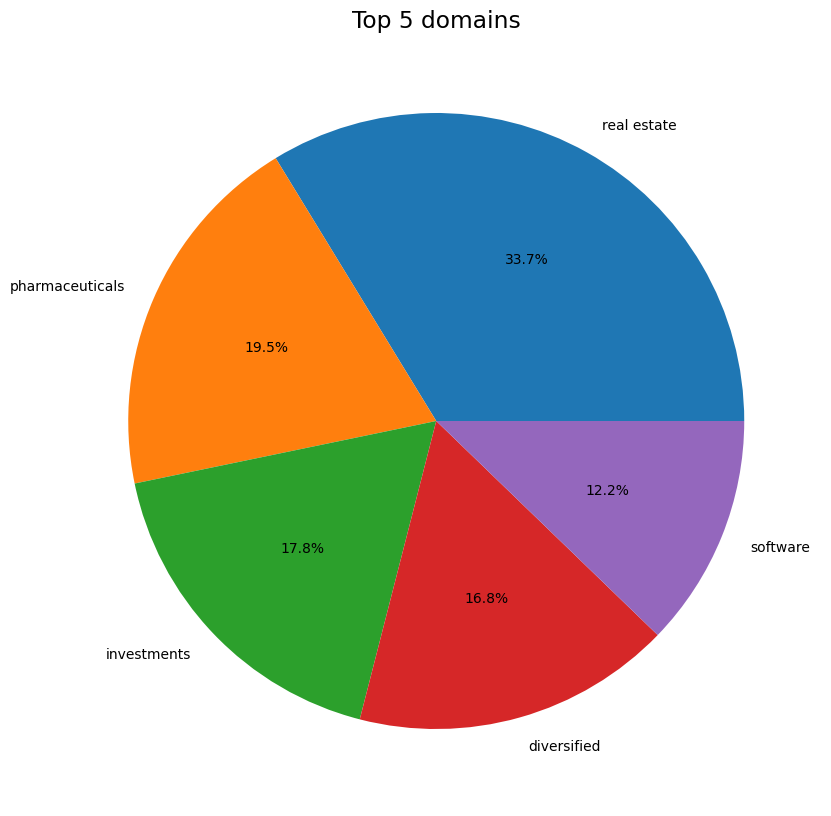

In [14]:
a = data['Source'].value_counts().head()
index = a.index
sources = a.values
plt.figure(figsize=(10,10))
plt.pie(sources, labels=index, autopct='%1.1f%%')
plt.rc('font', size=14)
plt.title('Top 5 domains')
plt.show()

#### Now let's look at top 5 industries with most of the billionaires

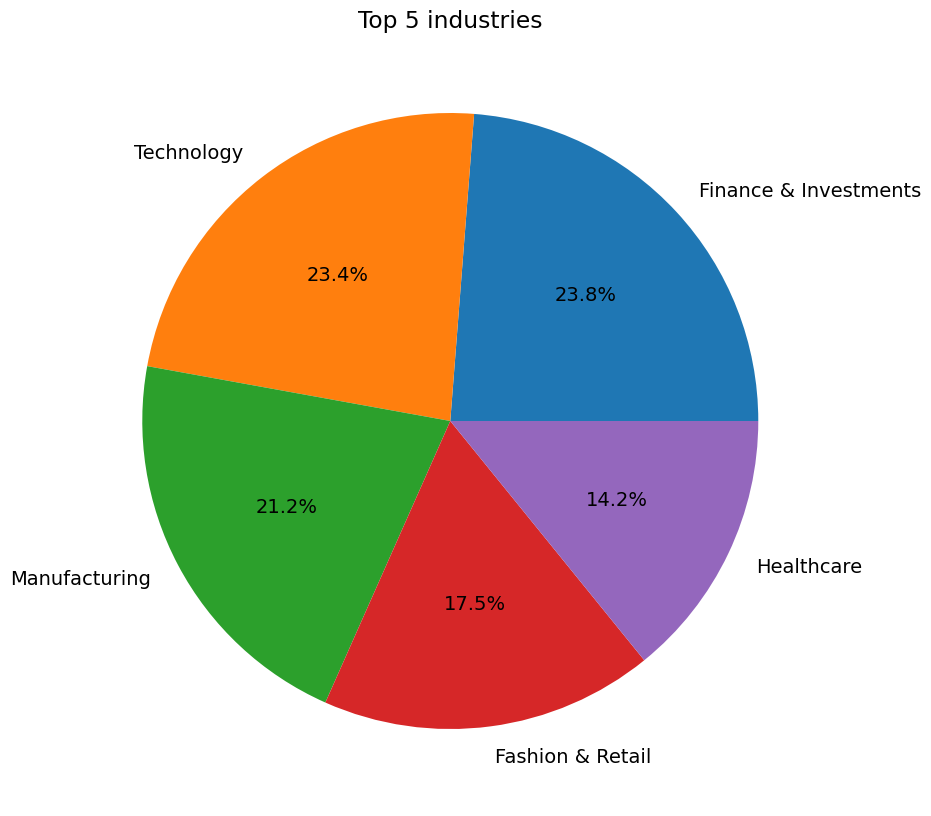

In [15]:
a = data['Industry'].value_counts().head()
index = a.index
sources = a.values
plt.figure(figsize=(10,10))
plt.pie(sources, labels=index, autopct='%1.1f%%')
plt.rc('font', size=14)
plt.title('Top 5 industries')
plt.show()